# Problem Set 2

## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

### Import data

In [2]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1

Using the `weather` dataset, construct a derived data frame having the following qualities:

1. Each row represents an observation day
2. Each column represents an hourly temperature observation.  That is, the dataframe includes 24 columns of the form `tmpmeasx`	where x ranges from 0 to 23 and represents the observation taken that hour.  (For changes from daylight savings time to standard time, there are two observations at the 1:00 hour (local).  You may discard one of the values arbitrarily.)

Using this derived dataset, show the average difference in temperature, standard deviation, and max/min values between observations taken in hours 2 (about 2:56am) and 14 (about 14:56, or 2:56pm).

**Note:** The derived (reshaped) data frame should comprise one row for each distinct date in the data set, and 25 columns (representing date together with 24 hourly measurements).  Assign a new column calculated as the difference between `tmpmeas14` and `tmpmeas2`.  This calculated column represents the temperature increase for the day between 2:56 and 14:56.  Find the summary statistics (mean, max, min, and standard deviation) for this column.

In [4]:
# Convert date to datetime and extract date and hour
wdf['date'] = pd.to_datetime(wdf['date'])
wdf['date_only'] = wdf['date'].dt.date
wdf['hour'] = wdf['date'].dt.hour

wdf = wdf.groupby(['date_only', 'hour'], as_index=False).agg({'tmp_meas': 'first'})

# Pivot the data
pivot_df = wdf.pivot(index='date_only', columns='hour', values='tmp_meas')

# Rename
pivot_df.columns = [f'tmpmeas{x}' for x in pivot_df.columns]

# 24 columns
pivot_df = pivot_df.loc[:, [f'tmpmeas{x}' for x in range(24) if f'tmpmeas{x}' in pivot_df.columns]]

# new column for temperature difference
if 'tmpmeas14' in pivot_df.columns and 'tmpmeas2' in pivot_df.columns:
    pivot_df['temp_diff'] = pivot_df['tmpmeas14'] - pivot_df['tmpmeas2']
else:
    print("some columns are missing.")

# summary statistics
summary_stats = pivot_df['temp_diff'].describe()

# Display
from IPython.display import display
display(pivot_df)


,tmpmeas0,tmpmeas1,tmpmeas2,tmpmeas3,tmpmeas4,tmpmeas5,tmpmeas6,tmpmeas7,tmpmeas8,tmpmeas9,...,tmpmeas15,tmpmeas16,tmpmeas17,tmpmeas18,tmpmeas19,tmpmeas20,tmpmeas21,tmpmeas22,tmpmeas23,temp_diff
date_only,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.2,6.1,6.7,6.1,5.6,NaN
2016-01-01,5.0,4.4,3.9,3.3,3.3,4.4,3.9,3.9,4.4,5.6,...,5.0,4.4,3.9,2.2,1.1,0.6,-0.6,0.6,0.6,1.7
2016-01-02,-0.6,-1.7,-1.7,-0.6,-2.8,-2.2,-2.8,-2.2,1.1,3.3,...,7.8,6.1,3.9,2.2,1.7,0.6,0.0,-1.1,-1.7,10.0
2016-01-03,-1.7,-1.7,-2.2,-2.8,-2.8,-0.6,-1.1,-2.8,1.7,5.6,...,10.6,8.9,5.6,3.9,2.8,1.7,0.6,0.0,-1.1,13.3
2016-01-04,-2.2,-1.7,-2.8,-1.7,0.0,0.0,0.6,0.6,0.6,0.0,...,0.0,-1.7,-2.2,-2.8,-3.3,-5.0,-6.1,-7.2,-8.3,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,23.9,23.3,23.3,23.3,23.3,23.3,22.8,23.9,24.4,25.0,...,25.6,25.6,25.0,25.0,24.4,23.9,23.3,23.9,23.9,2.8
2023-08-29,23.9,23.3,23.3,22.8,22.8,22.2,22.8,22.8,22.8,23.3,...,27.2,26.7,26.1,26.1,25.6,25.0,23.9,25.0,24.4,3.9
2023-08-30,23.9,23.9,23.9,23.9,23.3,23.9,23.9,23.9,26.1,26.7,...,30.6,30.6,28.9,27.2,25.6,23.9,23.9,22.8,21.7,6.7


## Question 2

**Circular data and One-Hot Encoding** Using the `Citations` data frame (`cdf`), discard records where the violation timestamp is not between January 1, 2021 and July 1, 2022.

In [5]:
cdf.head()


,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,000000091,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00-05:00,,2011-12-09 11:55:00
1,000000166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00-05:00,,2011-12-09 12:39:00
2,000000299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00-05:00,,2011-12-09 11:55:00
3,000000315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59-05:00,,2011-12-09 12:01:59
4,000000562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00-05:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00


In [6]:
import pandas as pd
import numpy as np

# Convert violation date to datetime format
cdf['violdate'] = pd.to_datetime(cdf['violdate'])

# Filter data (Jan 1, 2021 - Jul 1, 2022)
start_date = "2021-01-01"
end_date = "2022-07-01"
filtered_cdf = cdf[(cdf['violdate'] >= start_date) & (cdf['violdate'] <= end_date)].copy()

# Convert time of day to circular representation
filtered_cdf['hour'] = filtered_cdf['violdate'].dt.hour
filtered_cdf['hour_sin'] = np.sin(2 * np.pi * filtered_cdf['hour'] / 24)
filtered_cdf['hour_cos'] = np.cos(2 * np.pi * filtered_cdf['hour'] / 24)

# Drop hour column
filtered_cdf.drop(columns=['hour'], inplace=True)

# Apply One-Hot Encoding
encoded_cdf = pd.get_dummies(filtered_cdf, columns=['state', 'violcode'], drop_first=True)

# Display the cleaned and encoded dataset
from IPython.display import display
display(encoded_cdf.head())

# Print summary information
print(f"Number of records after filtering: {len(filtered_cdf)}")


,citation,tag,description,violfine,violdate,location,violdtl,hour_sin,hour_cos,state_AK,...,violcode_42,violcode_43,violcode_44,violcode_45,violcode_46,violcode_47,violcode_50,violcode_51,violcode_52,violcode_99
4632,001713171,N73LDS,No Stopping/Standing Not Tow-Away Zone,32,2021-01-31 18:40:00-05:00,,2021-01-31 18:40:00,-1.000000,-1.836970e-16,False,...,False,False,False,False,False,False,False,False,False,False
4633,001713189,9ET0286,All Other Stopping or Parking Violations,32,2021-12-29 17:00:00-05:00,,2021-12-29 17:00:00,-0.965926,-2.588190e-01,False,...,False,False,False,False,False,False,False,False,False,True
4634,001713197,9EP2809,All Other Stopping or Parking Violations,32,2021-12-29 17:00:00-05:00,,2021-12-29 17:00:00,-0.965926,-2.588190e-01,False,...,False,False,False,False,False,False,False,False,False,True
7770,003481843,3EJ7926,All Other Stopping or Parking Violations,32,2021-08-27 18:45:00-04:00,,2021-08-27 18:45:00,-1.000000,-1.836970e-16,False,...,False,False,False,False,False,False,False,False,False,True
10928,000130278,19213CD,No Stop/Park Street Cleaning,52,2021-06-06 23:40:00-04:00,"(39.28997272, -76.61002178)",2021-06-06 23:40:00,-0.258819,9.659258e-01,False,...,False,False,False,False,False,False,False,False,False,False


Number of records after filtering: 1524114


Identify the 5 most common violation types.  Remove from the derivative data frame any observation where the violation type is not among these 5 most common

In [7]:
import pandas as pd

# Read dataset
cdf = data602.read_citations()
cdf['violdate'] = pd.to_datetime(cdf['violdate'])

# Filter date range
cdf = cdf[(cdf['violdate'] >= "2021-01-01") & (cdf['violdate'] <= "2022-07-01")]

# top 5 most common violation codes
top_violation_codes = cdf['violcode'].value_counts().nlargest(5)

# Display
print(top_violation_codes)


violcode
32    688281
30    242996
31    151125
18    128513
22     86342
Name: count, dtype: int64


In [8]:
# for top 5 Most Common Violation Types
top_violation_types = cdf['description'].value_counts().nlargest(5).index
# Create a derived DataFrame
cdf_filtered = cdf[cdf['description'].isin(top_violation_types)]



Identify the average time of day for each violation in the derivative data frame.  (You will need to use the circular mean to compute this average.  Hint: begin by transforming the time of day to an angle on the unit circle, where $0=2\pi$ radians indicates midnight, and $\pi$ radians represents noon.)

Note: the following functions may be useful for this question:

In [9]:
import numpy as np
from typing import Tuple


@np.vectorize
def timetotheta(hr: int, min: int) -> float:
  """ Convert a time of day (hour, minute) to an angle on the unit circle
    (e.g., (12,0) -> pi)
  """
  ratio = (hr * 60 + min) / (23*60+60)
  return ratio * 2 * np.pi

@np.vectorize
def thetatotime(theta: float) -> (int, int):
  """ Convert a an angle on the unit circle to a time
    (e.g., pi -> "12:00")
  """
  theta = theta + (2 * np.pi) if theta < 0 else theta
  elapsedmin = np.round(theta/(2 * np.pi) * 24 * 60)
  hr, min = np.divmod(elapsedmin, 60)
  return f"{int(hr):02d}:{int(min):02d}"

In [10]:
# Convert violation date to datetime format
cdf['violdate'] = pd.to_datetime(cdf['violdate'])

# Filter data
start_date = "2021-01-01"
end_date = "2022-07-01"
filtered_cdf = cdf[(cdf['violdate'] >= start_date) & (cdf['violdate'] <= end_date)].copy()

# Extract hour and minute
filtered_cdf['hour'] = filtered_cdf['violdate'].dt.hour
filtered_cdf['minute'] = filtered_cdf['violdate'].dt.minute

# Convert (hour, minute) to angles (theta) on the unit circle
@np.vectorize
def timetotheta(hr: int, min: int) -> float:
    """Convert time of day (hour, minute) to an angle in radians."""
    ratio = (hr * 60 + min) / (24 * 60)  # Convert time to fraction of 24 hours
    return ratio * 2 * np.pi  # Convert to radians

filtered_cdf['theta'] = timetotheta(filtered_cdf['hour'], filtered_cdf['minute'])

# Compute the circular mean per violation type
def circular_mean(angles: np.ndarray) -> float:
    """Compute the circular mean of a set of angles (in radians)."""
    angles = angles.dropna()  # Ignore NaN values
    if len(angles) == 0:
        return np.nan  # Return NaN if no valid values
    x = np.mean(np.cos(angles))
    y = np.mean(np.sin(angles))
    return np.arctan2(y, x)  # Compute mean angle

# Compute circular mean for each violation type
violation_avg_time = filtered_cdf.groupby('description', observed=False)['theta'].apply(circular_mean).reset_index()

# Convert circular mean angle back to readable time
@np.vectorize
def thetatotime(theta: float) -> str:
    #Convert an angle (in radians) back to time (HH:MM).
    if np.isnan(theta):
        return "N/A"  # Handle NaN values
    theta = theta + (2 * np.pi) if theta < 0 else theta  # Adjust negative angles
    elapsed_min = np.round(theta / (2 * np.pi) * 24 * 60)  # Convert to minutes
    hr, min = np.divmod(elapsed_min, 60)  # Get hours and minutes
    return f"{int(hr):02d}:{int(min):02d}"  # Format as HH:MM

violation_avg_time['avg_time'] = thetatotime(violation_avg_time['theta'])

# Display results
from IPython.display import display
display(violation_avg_time[['description', 'avg_time']])

# Print summary
print("Average Time of Day for Each Violation Type:")
print(violation_avg_time[['description', 'avg_time']])


,description,avg_time
0,Abandonded Vehicle,11:29
1,All Other Parking Meter Violations,12:57
2,All Other Stopping or Parking Violations,13:56
3,Blocking Garage or Driveway,13:50
4,"Commercial Veh/Residence over 20,000 lbs",18:20
5,"Commercial Veh/Residence under 20,000 lbs",17:41
6,Commercial Vehicle Obstruct/Imped Traffic Flow,12:42
7,Exceeding 48 Hours,11:25
8,Expired Tags,11:39
9,Fire Lane/Handicapped Violation,20:56


Average Time of Day for Each Violation Type:
                                          description avg_time
0                                  Abandonded Vehicle    11:29
1                  All Other Parking Meter Violations    12:57
2            All Other Stopping or Parking Violations    13:56
3                         Blocking Garage or Driveway    13:50
4            Commercial Veh/Residence over 20,000 lbs    18:20
5           Commercial Veh/Residence under 20,000 lbs    17:41
6      Commercial Vehicle Obstruct/Imped Traffic Flow    12:42
7                                  Exceeding 48 Hours    11:25
8                                        Expired Tags    11:39
9                     Fire Lane/Handicapped Violation    20:56
10                                 Fixed Speed Camera    13:22
11                                   In Taxicab Stand    14:41
12                                      Interstate 83      N/A
13                       Less 30â€™ from Intersection    00:29
14        

In [11]:
import numpy as np
import pandas as pd

# Ensure we are working with a copy to avoid SettingWithCopyWarning
cdf_filtered = cdf[cdf['description'].isin(top_violation_types)].copy()

# Drop rows with missing violation timestamps
cdf_filtered = cdf_filtered.dropna(subset=['violdate'])

# Convert violdate to datetime format
cdf_filtered.loc[:, 'violdate'] = pd.to_datetime(cdf_filtered['violdate'])

# Extract hours and minutes
cdf_filtered.loc[:, 'hour'] = cdf_filtered['violdate'].dt.hour
cdf_filtered.loc[:, 'minute'] = cdf_filtered['violdate'].dt.minute

# Convert time to angle (theta)
cdf_filtered.loc[:, 'theta'] = timetotheta(cdf_filtered['hour'], cdf_filtered['minute'])

# Ensure we only compute circular mean for violations with multiple unique timestamps
valid_violations = cdf_filtered.groupby('description').filter(lambda x: x['theta'].nunique() > 1)

# Compute circular mean for each violation type
violation_avg_time = (
    valid_violations.groupby('description')['theta']
    .agg(lambda x: np.arctan2(np.sin(x).mean(), np.cos(x).mean()) if len(x) > 1 else np.nan)
    .dropna()  # Drop cases where the calculation fails
    .apply(thetatotime)  # Convert back to HH:MM format
)

# Display results
print("Average Time of Day for Each Violation Type:")
print(violation_avg_time)


<ipython-input-11-1846b266b2dd>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valid_violations = cdf_filtered.groupby('description').filter(lambda x: x['theta'].nunique() > 1)


Average Time of Day for Each Violation Type:
description
All Other Parking Meter Violations    12:57
Expired Tags                          11:39
Fixed Speed Camera                    13:22
Red Light Violation                   14:23
Right on Red                          13:48
Name: theta, dtype: object


<ipython-input-11-1846b266b2dd>:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valid_violations.groupby('description')['theta']


The violation type column is a nominal field.  Convert this field to one-hot encoded (OHE) variables, and add these variables to the data frame.

In [12]:
# Apply One-Hot Encoding (OHE) to 'violcode'
OHE = pd.get_dummies(cdf_filtered['violcode'])

# Rename columns
OHE.columns = [f"violcd_{cd}" for cd in OHE.columns]

# Concatenate the OHE columns with the original DataFrame
cdf_ohe = pd.concat([cdf_filtered, OHE], axis=1)

# Display
from IPython.display import display
display(cdf_ohe.head())

# Print
print("Columns in the updated DataFrame:", cdf_ohe.columns)


,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,hour,minute,theta,violcd_18,violcd_22,violcd_30,violcd_31,violcd_32
11813,000998922,B26506,VA,22,Expired Tags,32,2021-02-17 09:13:00-05:00,"(39.29069591, -76.61812865)",2021-02-17 09:13:00,9,13,2.412918,False,True,False,False,False
11814,000998930,72176CJ,MD,22,Expired Tags,32,2021-02-16 08:39:00-05:00,"(39.29075710, -76.62012660)",2021-02-16 08:39:00,8,39,2.264565,False,True,False,False,False
11815,000998948,4EG5744,MD,22,Expired Tags,32,2021-02-16 20:41:00-05:00,"(39.29075710, -76.62012660)",2021-02-16 20:41:00,20,41,5.414884,False,True,False,False,False
11816,000998955,8DN6216,MD,22,Expired Tags,32,2021-02-16 08:48:00-05:00,,2021-02-16 08:48:00,8,48,2.303835,False,True,False,False,False
11817,000998963,S0363681,GA,22,Expired Tags,32,2021-02-16 09:01:00-05:00,"(39.29192061, -76.62030785)",2021-02-16 09:01:00,9,1,2.360558,False,True,False,False,False


Columns in the updated DataFrame: Index(['citation', 'tag', 'state', 'violcode', 'description', 'violfine',
       'violdate', 'location', 'violdtl', 'hour', 'minute', 'theta',
       'violcd_18', 'violcd_22', 'violcd_30', 'violcd_31', 'violcd_32'],
      dtype='object')


## Question 3
 Join the citations and weather datasets to produce a merged data frame.  The merged data frame should provide, for each citation, the reported weather conditions for the closest weather observation.

In [13]:
print(cdf.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1524114 entries, 4632 to 7816494
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype                     
---  ------       --------------    -----                     
 0   citation     1524114 non-null  string                    
 1   tag          1524114 non-null  string                    
 2   state        1524114 non-null  string                    
 3   violcode     1524114 non-null  int64                     
 4   description  1524114 non-null  category                  
 5   violfine     1524114 non-null  int64                     
 6   violdate     1524114 non-null  datetime64[ns, US/Eastern]
 7   location     1524114 non-null  string                    
 8   violdtl      1524114 non-null  datetime64[ns]            
dtypes: category(1), datetime64[ns, US/Eastern](1), datetime64[ns](1), int64(2), string(4)
memory usage: 106.1 MB
None


In [14]:

print(wdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67195 entries, 0 to 67194
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_only  67195 non-null  object 
 1   hour       67195 non-null  int32  
 2   tmp_meas   67193 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.3+ MB
None


In [15]:
wdf.head()

,date_only,hour,tmp_meas
0,2015-12-31,19,7.2
1,2015-12-31,20,6.1
2,2015-12-31,21,6.7
3,2015-12-31,22,6.1
4,2015-12-31,23,5.6


In [16]:
import pandas as pd

# Ensure timestamps are in datetime format
cdf_filtered.loc[:, 'violdate'] = pd.to_datetime(cdf_filtered['violdate'])
wdf['date_only'] = pd.to_datetime(wdf['date_only'])

# Ensure timezone consistency by removing timezones (if present)
if cdf_filtered['violdate'].dt.tz is not None:
    cdf_filtered.loc[:, 'violdate'] = cdf_filtered['violdate'].dt.tz_convert(None)
if wdf['date_only'].dt.tz is not None:
    wdf.loc[:, 'date_only'] = wdf['date_only'].dt.tz_convert(None)

# Create full weather timestamp
wdf['weather_timestamp'] = wdf['date_only'] + pd.to_timedelta(wdf['hour'], unit='h')

# Sort both datasets by time
cdf_filtered = cdf_filtered.sort_values('violdate')
wdf = wdf.sort_values('weather_timestamp')

# Ensure citations fall within weather dataset range
cdf_filtered = cdf_filtered[cdf_filtered.violdate >= wdf.weather_timestamp.min()]

# Merge using the closest weather observation
merged_df = pd.merge_asof(cdf_filtered, wdf, left_on='violdate', right_on='weather_timestamp', direction='nearest')

# Drop unnecessary columns (if they exist)
columns_to_drop = ['date_only', 'hour', 'weather_timestamp']
existing_columns = [col for col in columns_to_drop if col in merged_df.columns]
merged_df.drop(columns=existing_columns, inplace=True)

# Display results
from IPython.display import display
display(merged_df.head())

# Print final column names
print("Columns in the merged DataFrame:", merged_df.columns)


<ipython-input-16-eb57eb45ae9c>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2021-02-17 14:13:00', '2021-02-16 13:39:00', '2021-02-17 01:41:00',
 '2021-02-16 13:48:00', '2021-02-16 14:01:00', '2021-02-16 14:04:59',
 '2021-02-16 14:17:59', '2021-02-16 14:26:00', '2021-02-16 14:29:00',
 '2021-01-05 04:44:00',
 ...
 '2021-10-01 21:21:00', '2021-10-01 21:35:00', '2021-10-01 21:44:00',
 '2022-04-15 06:13:59', '2022-06-28 08:50:00', '2022-06-08 12:21:00',
 '2022-06-30 13:38:00', '2022-04-23 16:06:00', '2021-06-30 13:38:00',
 '2022-05-17 16:43:59']
Length: 1297257, dtype: datetime64[ns]' has dtype incompatible with datetime64[ns, US/Eastern], please explicitly cast to a compatible dtype first.
  cdf_filtered.loc[:, 'violdate'] = cdf_filtered['violdate'].dt.tz_convert(None)


,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,hour_x,minute,theta,hour_y,tmp_meas
0,057463433,5DT8850,MD,31,Right on Red,75,2021-01-01 05:11:00,,2021-01-01 00:11:00,0,11,0.047997,5,0.0
1,057463441,8EL4556,MD,30,Red Light Violation,75,2021-01-01 05:14:00,,2021-01-01 00:14:00,0,14,0.061087,5,0.0
2,057463458,7ED9027,MD,31,Right on Red,75,2021-01-01 05:33:00,,2021-01-01 00:33:00,0,33,0.143990,6,-0.6
3,057463466,5DT5983,MD,30,Red Light Violation,75,2021-01-01 05:39:00,,2021-01-01 00:39:00,0,39,0.170170,6,-0.6
4,057463474,9DD7485,MD,31,Right on Red,75,2021-01-01 05:43:59,,2021-01-01 00:43:59,0,43,0.187623,6,-0.6


Columns in the merged DataFrame: Index(['citation', 'tag', 'state', 'violcode', 'description', 'violfine',
       'violdate', 'location', 'violdtl', 'hour_x', 'minute', 'theta',
       'hour_y', 'tmp_meas'],
      dtype='object')


In [17]:
cdf = data602.read_citations()
wdf = data602.read_weather()
cdf['violdate'] = pd.to_datetime(cdf['violdate']).dt.tz_localize(None)
wdf['date'] = pd.to_datetime(wdf['date']).dt.tz_localize(None)

In [18]:
wdf.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00,2.1,5.6,0.0,0,4.0,0,0,0,0


In [19]:

cdf.head()

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl
0,000000091,03W671,MD,27,No Stop/Park Street Cleaning,52,2011-12-09 11:55:00,,2011-12-09 11:55:00
1,000000166,T294093T,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2011-12-09 12:39:00,,2011-12-09 12:39:00
2,000000299,19TLR318,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 11:55:00,,2011-12-09 11:55:00
3,000000315,14TLR551,ME,99,All Other Stopping or Parking Violations,32,2011-12-09 12:01:59,,2011-12-09 12:01:59
4,000000562,9AE2340,MD,18,All Other Parking Meter Violations,32,2011-12-12 10:47:00,LAFAYETTE MARKET LOT Baltimore MD,2011-12-12 10:47:00


In [21]:
import pandas as pd
from IPython.display import display

# making sure that datetime columns are in the same precision
cdf['violdate'] = pd.to_datetime(cdf['violdate']).astype('datetime64[ns]')
wdf['date'] = pd.to_datetime(wdf['date']).astype('datetime64[ns]')

# Sorting by timestamp
cdf = cdf.sort_values('violdate')
wdf = wdf.sort_values('date')

# merge to find the closest weather observation
merged_df = pd.merge_asof(cdf, wdf, left_on='violdate', right_on='date', direction='nearest')

# Drop the redundant 'date' column (since 'violdate' serves the same purpose)
merged_df.drop(columns=['date'], inplace=True)

# Display
display(merged_df.head(10))  # Shows the first 10 rows in a tabular format


,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,040231789,YRJ641,MD,30,Red Light Violation,75,1999-07-27 04:11:00,,1999-07-27 04:11:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,041021270,GES259,MD,30,Red Light Violation,75,2000-05-26 14:41:00,,2000-05-26 14:41:00,1.5,7.2,0.0,0,4.0,0,0,0,0
2,041036682,CYX244,MD,30,Red Light Violation,75,2000-06-01 18:59:59,,2000-06-01 18:59:59,1.5,7.2,0.0,0,4.0,0,0,0,0
3,041379157,DYH813,MD,30,Red Light Violation,75,2000-08-26 01:47:00,,2000-08-26 01:47:00,1.5,7.2,0.0,0,4.0,0,0,0,0
4,043219849,A006827,MD,30,Red Light Violation,75,2002-01-26 09:11:59,,2002-01-26 09:11:59,1.5,7.2,0.0,0,4.0,0,0,0,0
5,043327899,M012826,MD,30,Red Light Violation,75,2002-02-26 13:41:59,,2002-02-26 13:41:59,1.5,7.2,0.0,0,4.0,0,0,0,0
6,043337120,M763106,MD,30,Red Light Violation,75,2002-03-02 01:46:00,,2002-03-02 01:46:00,1.5,7.2,0.0,0,4.0,0,0,0,0
7,043373166,M334188,MD,30,Red Light Violation,75,2002-03-13 00:48:00,,2002-03-13 00:48:00,1.5,7.2,0.0,0,4.0,0,0,0,0
8,043413301,GRZ829,MD,30,Red Light Violation,75,2002-03-26 14:23:59,,2002-03-26 14:23:59,1.5,7.2,0.0,0,4.0,0,0,0,0
9,043436294,JCB188,MD,30,Red Light Violation,75,2002-04-03 12:43:00,,2002-04-03 12:43:00,1.5,7.2,0.0,0,4.0,0,0,0,0


From this joined data set, examine instances of fixed speed camera citations (violation type 32).  Does weather affect citation volumes?  Justify your conclusion. [Note: your response need not be statistically sound; it is sufficient to justify your conclusion through visual or descriptive analysis.]

In [22]:
#filter for fixed speed camera citations (violation type 32)
speed_camera_citation_df = merged_df[merged_df['violcode'] == 32]


In [23]:
speed_camera_citation_df = merged_df[merged_df['violcode'] == 32]

weather_summary = speed_camera_citation_df.groupby(['tstorm', 'winter', 'mist', 'fog'])['citation'].count().reset_index()
weather_summary.columns = ['Thunderstorm', 'Winter Conditions', 'Mist', 'Fog', 'Citation Count']

print(weather_summary)

   Thunderstorm  Winter Conditions  Mist  Fog  Citation Count
0             0                  0     0    0         2864925
1             0                  0     0    1            8696
2             0                  0     1    0          153530
3             0                  0     1    1            1663
4             0                  1     0    0            5887
5             0                  1     0    1             111
6             0                  1     1    0            4786
7             1                  0     0    0           12650
8             1                  0     0    1             931
9             1                  0     1    0            2348


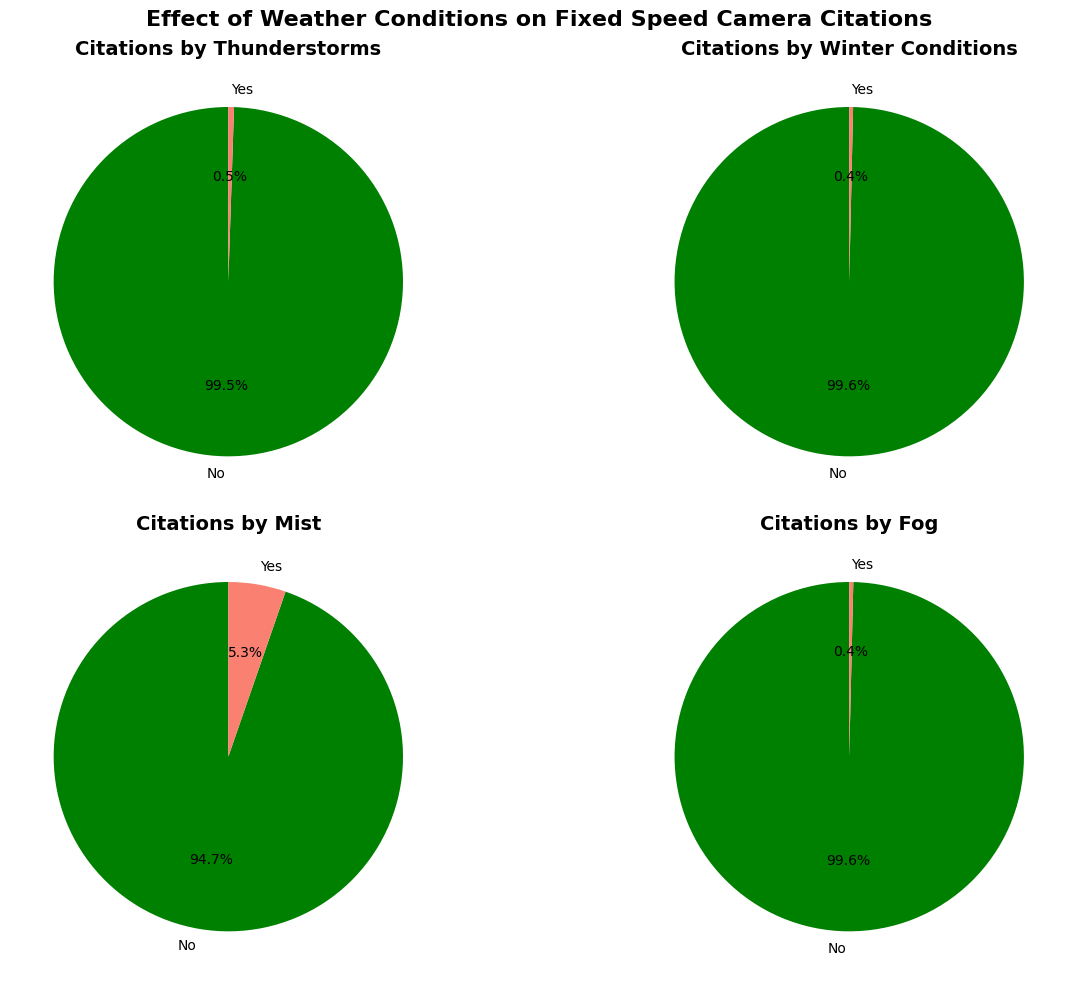

In [24]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Set up a 2x2 subplot layout
fig.suptitle("Effect of Weather Conditions on Fixed Speed Camera Citations", fontsize=16, fontweight='bold')

# Weather variables
weather_vars = ['tstorm', 'winter', 'mist', 'fog']
titles = ["Thunderstorms", "Winter Conditions", "Mist", "Fog"]

for i, var in enumerate(weather_vars):
    ax = axes[i // 2, i % 2]
    counts = speed_camera_citation_df[var].value_counts()

    # Pie chart
    ax.pie(counts, labels=["No", "Yes"], autopct='%1.1f%%', colors=['Green', 'salmon'], startangle=90)
    ax.set_title(f"Citations by {titles[i]}", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
